## Import torch and some basic modules

In [6]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os

## Load Dataset

In [7]:
batch_size = 100
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train']}

## Visualize some images

using skimage to load data as numpy.array

In [32]:
import skimage
from skimage import data

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(d)
    return images, labels

train_data_directory = "data/train"
test_data_directory = "data/test1"

images, labels = load_data(train_data_directory)

visualize one picture from each class

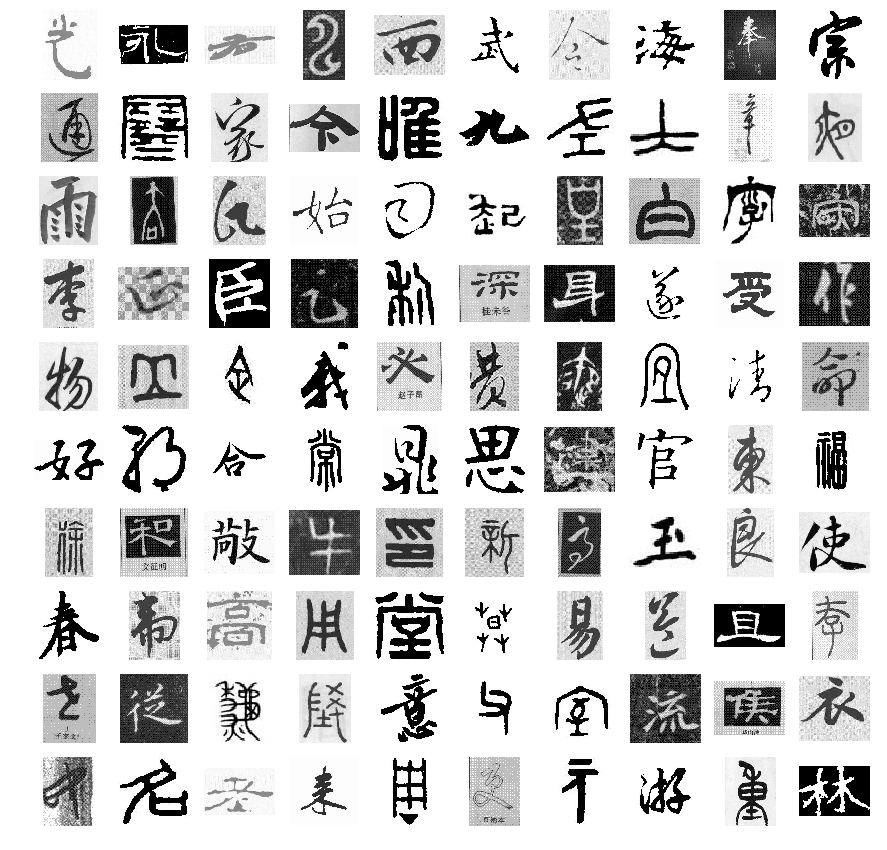

In [36]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = rgb2gray(images[labels.index(label)])
    # Define 100 subplots 
    plt.subplot(10, 10, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image, cmap = "gray")
    
# Show the plot
plt.show()

Construct different ConvNets

In [49]:
class ConvNet_L6(nn.Module):
    def __init__(self):
        super(ConvNet_L6, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [50]:
class ConvNet_L7(nn.Module):
    def __init__(self):
        super(ConvNet_L7, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [51]:
class ConvNet_L7Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L7Plus, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 128, 3, 1, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*512,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [52]:
class ConvNet_L9(nn.Module):
    def __init__(self):
        super(ConvNet_L9, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [53]:
class ConvNet_L9Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L9Plus, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [54]:
class ConvNet_L11(nn.Module):
    def __init__(self):
        super(ConvNet_L11, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [55]:
class ConvNet_L11Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L11Plus, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [56]:
class ConvNet_L13(nn.Module):
    def __init__(self):
        super(ConvNet_L13, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x)), 2, 2
        x = F.relu(self.conv4_2(x)), 2, 2
        x = F.relu(self.conv4_3(x)), 2, 2
        x = F.max_pool2d(F.relu(self.conv4_4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

Define traning process

In [19]:
class Training():
    def __init__(self,dataloaders,ConvNet,epoch = 15):
        self.all_losses = []
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data), Variable(target)#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    self.all_losses.append(loss.data[0])
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0]))

initialize model instances

In [61]:
model_l6  = ConvNet_L6()
model_l7  = ConvNet_L7()
model_l7p = ConvNet_L7Plus()
model_l9  = ConvNet_L9()
model_l9p = ConvNet_L9Plus()
model_l11 = ConvNet_L11()
model_l11p= ConvNet_L11Plus()
model_l13 = ConvNet_L13()
Models = [model_l6, model_l7, model_l7p, model_l9, model_l9p, model_l11, model_l11p, model_l13]

start training:

In [ ]:
for model in Models:
    train = Training(dataloaders, model)
    train.start()